## Solution Of  Internal Paper Of IBA CICT 2023
## Program :  NAVTTC  
## Course : Big Data Analytics (BDA) 
## Batch : 4

In [68]:
# fits column widths
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Question paper
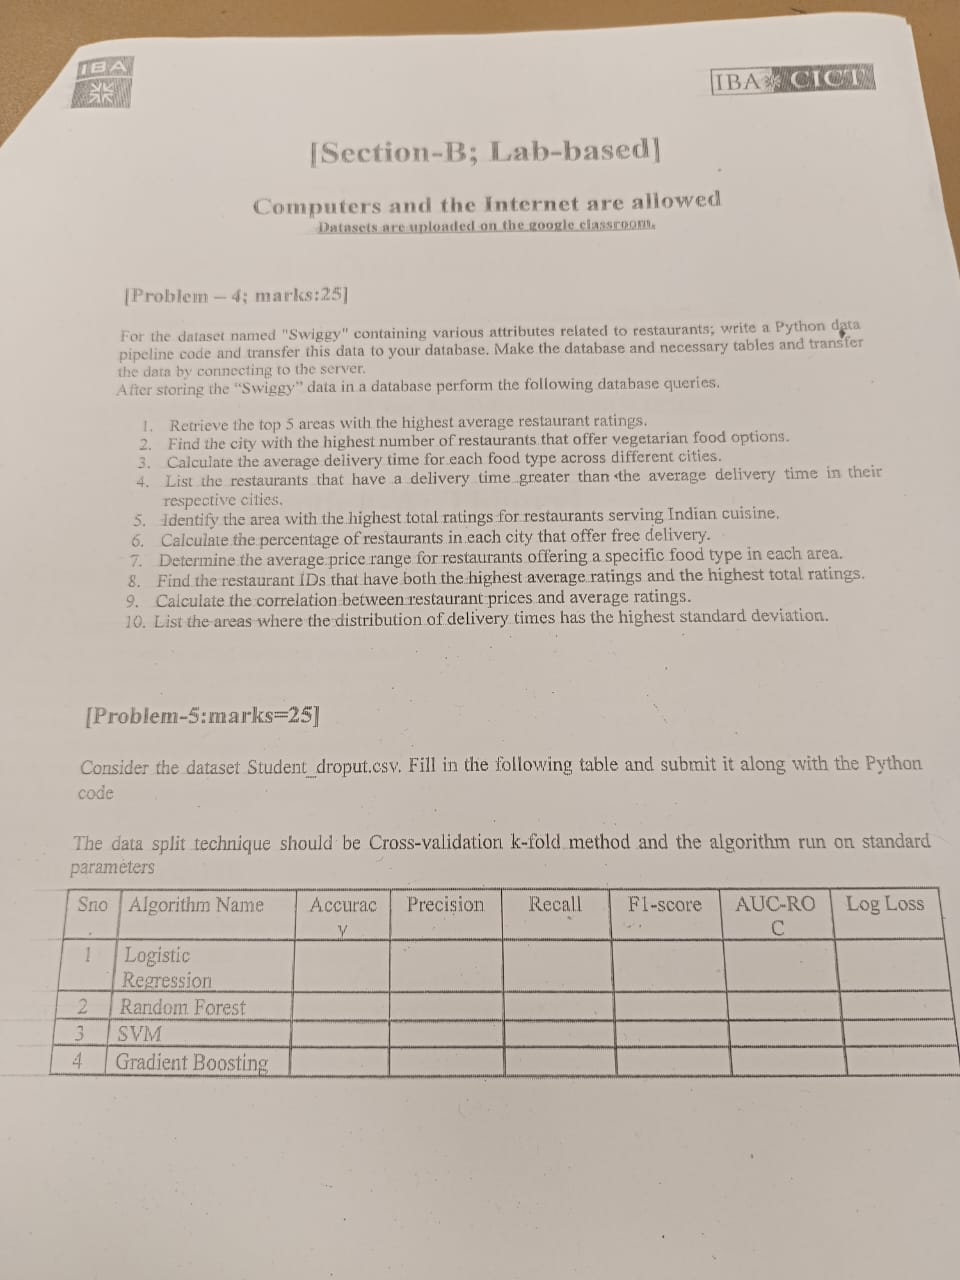

In [1]:
import numpy as np
import pandas as pd
import re
import os
import pymysql
import sqlalchemy

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [19]:
df=pd.read_csv('swiggy.csv')

In [20]:
df.head(2)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56


In [21]:
# Replace spaces in between column names with underscores to avoid SQL error this change reflects in original dataframe
df.columns=[column.replace(" ", "_") for column in df.columns.to_list()]

# Get column names and data types
column_names = df.columns.tolist()
data_types = df.dtypes.tolist()

# columns changed
df.head(1)

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59


In [22]:
column_names,data_types

(['ID',
  'Area',
  'City',
  'Restaurant',
  'Price',
  'Avg_ratings',
  'Total_ratings',
  'Food_type',
  'Address',
  'Delivery_time'],
 [dtype('int64'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('float64'),
  dtype('float64'),
  dtype('int64'),
  dtype('O'),
  dtype('O'),
  dtype('int64')])

In [6]:
df.shape

(8680, 10)

In [23]:
# FOR ASSESSING LIMIT OF DATA TYPE OF COLUMNS 
for column, dtype in zip(column_names, data_types):
    if dtype == 'int64':
        print(f'\nINT---------INT\n{column},{dtype} Range is {df[column].min()} - {df[column].max()}')
    elif dtype == 'object':
        print(f'\nOBJECT#########OBJECT\n{column},{dtype} value width is {df[column].str.len().min()} - {df[column].str.len().max()}')
    else:
        print(f'\nFL+++++++++FL\n{column},{dtype} Range is {df[column].min()} - {df[column].max()}')


INT---------INT
ID,int64 Range is 211 - 466928

OBJECT#########OBJECT
Area,object value width is 2 - 48

OBJECT#########OBJECT
City,object value width is 4 - 9

OBJECT#########OBJECT
Restaurant,object value width is 2 - 74

FL+++++++++FL
Price,float64 Range is 0.0 - 2500.0

FL+++++++++FL
Avg_ratings,float64 Range is 2.0 - 5.0

INT---------INT
Total_ratings,int64 Range is 20 - 10000

OBJECT#########OBJECT
Food_type,object value width is 4 - 202

OBJECT#########OBJECT
Address,object value width is 3 - 90

INT---------INT
Delivery_time,int64 Range is 20 - 109


In [25]:
# Generate the SQL command
table_name = 'swiggytable'  # Replace with your desired table name
sql_command = f"CREATE TABLE {table_name} (\n"

for column, dtype in zip(column_names, data_types):
    if dtype == 'int64':
        sql_command += f"    {column} INT(10),\n"
    elif dtype == 'object':
        sql_command += f"    {column} VARCHAR(300),\n"
    # Add more data type conditions if needed
    else:
        sql_command += f"    {column} FLOAT(10,5),\n"
    

sql_command = sql_command.rstrip(",\n") + "\n);"

print(sql_command)

CREATE TABLE swiggytable (
    ID INT(10),
    Area VARCHAR(300),
    City VARCHAR(300),
    Restaurant VARCHAR(300),
    Price FLOAT(10,5),
    Avg_ratings FLOAT(10,5),
    Total_ratings INT(10),
    Food_type VARCHAR(300),
    Address VARCHAR(300),
    Delivery_time INT(10)
);


In [26]:
# Create connection
import pymysql.cursors

conn = pymysql.connect(
        host='',
        user='', 
        password = "", #replace with your values
        db='swiggy', #this should be the database you want to operate on
        )

In [27]:
cursor = conn.cursor()

In [28]:
# Checking connection
cursor.execute("SELECT 1")  # A simple query to test the connection
result = cursor.fetchone()

if result:
    print('Connection is made')
else:
    print('Connection is not made')

Connection is made


In [29]:
# Also one way to test connection
conn.open

True

In [30]:
cursor.execute(sql_command)

0

In [31]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root:@localhost/swiggy')

#### <span style="color:red"> if_exists = 'replace' </span> can be used to create a table from scratch which is easier but will cause performance issues because it will assume datatypes of columns

#### we will insert data by using <span style="color:red"> if_exists = 'append' </span> to only insert values

In [32]:
df.to_sql(name='swiggytable', con=engine, if_exists='append', index=False)

In [33]:
query = "SELECT COUNT(*) FROM swiggytable"
cursor.execute(query)

# Fetch the first 5 records
print(f'The count of records is {cursor.fetchall()}')


The count of records is ((8680,),)


###  Running Queries (1 to 10 )

In [34]:
# Formatting for better view
from tabulate import tabulate

In [156]:
# 1. Retrieve the top 5 areas with the highest average restaurant ratings. 

query1="SELECT DISTINCT Area, Avg_ratings FROM swiggytable ORDER BY Avg_ratings DESC LIMIT 5;"
cursor.execute(query1)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+--------------+---------------+
| Area         |   Avg_ratings |
|--------------+---------------|
| Andheri East |             5 |
| Annanagar    |             5 |
| Bandra East  |             5 |
| Basavanagudi |             5 |
| Bkc          |             5 |
+--------------+---------------+


### Q2 
### Extracting all food_types to see the unique ones then check veg options

In [36]:
all_elements = ' '.join(df.Food_type.to_list())
all_elements

'Biryani,Chinese,North Indian,South Indian Mughlai,Lucknowi Chinese North Indian,Punjabi,Tandoor,Chinese Rajasthani,Gujarati,North Indian,Snacks,Desserts,Beverages,Thalis,Chaat Mughlai,North Indian Mexican,Beverages,Salads Desserts,British,Bakery,Pizzas,Snacks American,Italian,Beverages,Continental,Chinese,Pastas,Pizzas,Fast Food Bengali Chinese,Thai,Nepalese North Indian,Chinese Mughlai,North Indian,Biryani American,Continental Fast Food,Beverages,Bengali,Biryani,Indian,North Indian,Snacks,Street Food Mughlai,North Indian Kerala,Seafood Bengali,Fast Food,Chinese Seafood,Andhra,Biryani,South Indian,Combo,Desserts,Beverages Mughlai,North Indian,Chinese,Thai,Asian Mughlai,Bengali North Indian,Chinese,South Indian Arabian,Biryani,North Indian,Chinese Biryani,Tandoor,Chinese,Indian,Desserts,Kebabs,Mughlai Desserts,Fast Food,Bakery Chinese  Thai  Asian Mughlai,North Indian,Chinese,Seafood,Italian Chinese,Seafood Steakhouse,American Chinese,Asian,Pan-Asian,Thai,Oriental Chinese,Asian,Thai Br

In [37]:
all_elements = all_elements.replace(' ', ',')
all_elements

'Biryani,Chinese,North,Indian,South,Indian,Mughlai,Lucknowi,Chinese,North,Indian,Punjabi,Tandoor,Chinese,Rajasthani,Gujarati,North,Indian,Snacks,Desserts,Beverages,Thalis,Chaat,Mughlai,North,Indian,Mexican,Beverages,Salads,Desserts,British,Bakery,Pizzas,Snacks,American,Italian,Beverages,Continental,Chinese,Pastas,Pizzas,Fast,Food,Bengali,Chinese,Thai,Nepalese,North,Indian,Chinese,Mughlai,North,Indian,Biryani,American,Continental,Fast,Food,Beverages,Bengali,Biryani,Indian,North,Indian,Snacks,Street,Food,Mughlai,North,Indian,Kerala,Seafood,Bengali,Fast,Food,Chinese,Seafood,Andhra,Biryani,South,Indian,Combo,Desserts,Beverages,Mughlai,North,Indian,Chinese,Thai,Asian,Mughlai,Bengali,North,Indian,Chinese,South,Indian,Arabian,Biryani,North,Indian,Chinese,Biryani,Tandoor,Chinese,Indian,Desserts,Kebabs,Mughlai,Desserts,Fast,Food,Bakery,Chinese,,Thai,,Asian,Mughlai,North,Indian,Chinese,Seafood,Italian,Chinese,Seafood,Steakhouse,American,Chinese,Asian,Pan-Asian,Thai,Oriental,Chinese,Asian,Thai,Br

In [38]:
cuisine_list = all_elements.split(',')
cuisine_list[1:50]

['Chinese',
 'North',
 'Indian',
 'South',
 'Indian',
 'Mughlai',
 'Lucknowi',
 'Chinese',
 'North',
 'Indian',
 'Punjabi',
 'Tandoor',
 'Chinese',
 'Rajasthani',
 'Gujarati',
 'North',
 'Indian',
 'Snacks',
 'Desserts',
 'Beverages',
 'Thalis',
 'Chaat',
 'Mughlai',
 'North',
 'Indian',
 'Mexican',
 'Beverages',
 'Salads',
 'Desserts',
 'British',
 'Bakery',
 'Pizzas',
 'Snacks',
 'American',
 'Italian',
 'Beverages',
 'Continental',
 'Chinese',
 'Pastas',
 'Pizzas',
 'Fast',
 'Food',
 'Bengali',
 'Chinese',
 'Thai',
 'Nepalese',
 'North',
 'Indian',
 'Chinese']

In [39]:
# set auto picks unique elements
unique_cuisines = set(cuisine_list)
unique_cuisines

{'',
 '&',
 '(The',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Attractive',
 'Australian',
 'Available',
 'Awadhi',
 'Bakery',
 'Bangladeshi',
 'Barbecue',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bowl',
 'Brand',
 'British',
 'Burmese',
 'Cafe',
 'Cakes',
 'Chaat',
 'Chettinad',
 'Chinese',
 'Coastal',
 'Combo',
 'Combos',
 'Company',
 'Continental',
 'Cream',
 'Customers',
 'Desserts',
 'Discount',
 'Eastern',
 'European',
 'Fast',
 'Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Haleem',
 'Healthy',
 'Home',
 'Hyderabadi',
 'Ice',
 'Indian',
 'Indonesian',
 'Italian',
 'Italian-American',
 'Jain',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebabs',
 'Kerala',
 'Keto',
 'Keventers',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Navratri',
 'Nepalese',
 'New',
 'North',
 'Of

In [40]:
len(unique_cuisines)

138

After removing the irrelevant terms from the list, the total length of the remaining food options is:

Total length: 129

Cuisines overview 


# Food Types

| Food Type | Description | Notes |
|---|---|---|
| Afghani | Non-veg dishes from Afghanistan, like kebabs and rice | Often includes rice and grilled meats. |
| African | Diverse cuisine with both veg and non-veg options | Can be very spicy. |
| American | Broad cuisine with a mix of veg and non-veg dishes | Includes dishes from all over the United States. |
| Andhra | South Indian cuisine, both veg and non-veg, known for spiciness | Often includes rice, lentils, and spices. |
| Arabian | Middle Eastern cuisine, offers both veg and non-veg dishes | Can be very flavorful and aromatic. |
| Asian | Diverse cuisine with veg and non-veg options | Can be very spicy or mild. |
| Australian | Cuisine with various dishes including veg and non-veg | Often includes seafood and lamb. |
| Awadhi | Indian cuisine with rich non-veg dishes | Often includes ghee and cream. |
| Bakery | Offers veg and non-veg baked goods | Can include cakes, pastries, and breads. |
| Bangladeshi | Cuisine from Bangladesh, includes both veg and non-veg | Often includes rice, lentils, and spices. |
| Barbecue | Often includes veg and non-veg grilled dishes | Can be very smoky. |
| Bengali | Cuisine from West Bengal, offers veg and non-veg dishes | Often includes rice, fish, and sweets. |
| Beverages | Drinks, typically veg | Can include juices, sodas, and coffee. |
| Bihari | Cuisine from Bihar, includes both veg and non-veg | Often includes rice, lentils, and spices. |
| Biryani | Rice dish, can be veg or non-veg | Often includes meat or vegetables, rice, and spices. |
| Bowl | General term, may refer to various veg and non-veg dishes | Can be a salad, soup, or stir-fry. |
| British | Cuisine from the UK, includes both veg and non-veg | Often includes fish and chips, pies, and puddings. |
| Burmese | Cuisine from Myanmar, has both veg and non-veg options | Often includes rice, noodles, and curries. |
| Cafe | Offers various foods including veg and non-veg options | Can include sandwiches, salads, and pastries. |
| Cakes | Sweets, often veg | Can be made with a variety of flavors and ingredients. |
| Chaat | Indian savory snacks, usually veg | Often includes chickpeas, potatoes, and spices. |
| Chettinad | South Indian cuisine with both veg and non-veg dishes | Known for its use of spices. |
| Chinese | Offers both veg and non-veg dishes | Can be very flavorful and aromatic. |
| Coastal | Often includes seafood but can have veg options | Can be very fresh and flavorful. |
| Combos | Mixed meal options, veg and non-veg | Can be a good way to try a variety of dishes. |
| Continental | European cuisine, includes both veg and non-veg | Often includes pasta, risotto, and grilled meats. |
| Cream | Can refer to various dishes, often veg | Can be used to add richness and flavor to dishes. |
| Desserts | Sweets, usually veg | Can include cakes, pastries, and ice cream. |
| Eastern | Broad term, includes both veg and non-veg dishes | Can be very flavorful and aromatic. |
| European | Cuisine from Europe, offers both veg and non-veg | Often includes pasta, risotto, and grilled meats. |
| Fast Food | Various quick meals, includes veg and non-veg | Can be a convenient option for a quick bite to eat. |
| French | Cuisine from France, includes both veg and non-veg | Often includes pastries, cheese, and wine. |
| German | Cuisine from Germany, includes both veg and non-veg | Often includes sausages, beer, and pretzels. |
| Goan | Cuisine from Goa, includes both veg and non-veg | Often includes seafood and coconut. |
| Greek | Cuisine from Greece, offers both veg and non-veg | Often includes grilled meats, seafood, and yogurt. |
| Grill | Often includes both veg and non-veg grilled items | Can be a healthy option for a meal. |
| Haleem | Dish with meat, often non-veg | Made with lentils, meat, and spices. |
| Healthy | Various health-focused dishes, can include veg and non-veg | Can be a good
|Keventers | A popular milkshake and dessert brand known for its milkshakes and dairy-based treats|
| North Eastern | Cuisine from the northeastern regions of India, including states like Assam, Manipur, and Nagaland |
|Bowl Company| A place offering meals served in bowls, often with a variety of ingredients like grains, veggies, and proteins |
|Oriya | Cuisine from the Odisha state in India, known for its unique flavors and vegetarian and non-vegetarian dishes |
|Rayalaseema | Cuisine from the Rayalaseema region in Andhra Pradesh,India, with a mix of vegetarian and non-vegetarian dishes|


# Veg Options 

| Food Type | Veg | Notes |
|---|---|---|
| Ice cream | Usually | Can be made with dairy products. |
| Paan | Often | Betel leaf preparations. |
| Rajasthani | Many options | Cuisine from the Indian state of Rajasthan. |
| Salads | Typically | Many different types available. |
| Sweets | Typically | Many different types available from all over the world. |
| Waffle | Can be made with either | There are many popular veg waffle recipes available. |
| Chaat | Usually | Indian savory snacks. |
| South Indian | Relatively high proportion | Cuisine from the southern part of India. |
| Telangana | Relatively high proportion | Cuisine from the Indian state of Telangana. |
| Gujarati | Many options | Cuisine from the Indian state of Gujarat. |
| Jain | Many options | Cuisine that follows the Jain dietary restrictions. |
| Maharashtrian | Many options | Cuisine from the Indian state of Maharashtra. |
| Kerala | Many options | Cuisine from the Indian state of Kerala. |


In [157]:
# 2. Find the city with the highest number of restaurants that offer vegetarian food options.

query2="""
SELECT
    city,
    COUNT(ID) AS num_restaurants_with_vegetarian_options
FROM
    swiggytable
WHERE
    city IS NOT NULL
    AND (
        Food_type LIKE '%Ice cream%' OR
        Food_type LIKE '%Paan%' OR
        Food_type LIKE '%Rajasthani%' OR
        Food_type LIKE '%Salads%' OR
        Food_type LIKE '%Sweets%' OR
        Food_type LIKE '%Waffle%' OR
        Food_type LIKE '%Chaat%' OR
        Food_type LIKE '%South Indian%' OR
        Food_type LIKE '%Telangana%' OR
        Food_type LIKE '%Gujarati%' OR
        Food_type LIKE '%Jain%' OR
        Food_type LIKE '%Maharashtrian%' OR
        Food_type LIKE '%Kerala%'
    )
GROUP BY
    city
ORDER BY
    num_restaurants_with_vegetarian_options DESC
LIMIT 1;
"""
cursor.execute(query2)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+---------+-------------------------------------------+
| city    |   num_restaurants_with_vegetarian_options |
|---------+-------------------------------------------|
| Chennai |                                       374 |
+---------+-------------------------------------------+


In [161]:
# 3. Calculate the average delivery time for each food type across different cities. 

query3="Select City, avg(Delivery_time) as Average_Delivery_Time from swiggytable group by City order by City;"
cursor.execute(query3)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+-----------+-------------------------+
| City      |   Average_Delivery_Time |
|-----------+-------------------------|
| Ahmedabad |                 44.7099 |
| Bangalore |                 50.5296 |
| Chennai   |                 58.9684 |
| Delhi     |                 50.7349 |
| Hyderabad |                 49.933  |
| Kolkata   |                 67.8098 |
| Mumbai    |                 48.3187 |
| Pune      |                 55.8541 |
| Surat     |                 48.4844 |
+-----------+-------------------------+


In [162]:
# 4. List the restaurants that have a delivery time greater than the average delivery time in their respective cities.

query4=""" 
select Restaurant,City,Delivery_time,avg(Delivery_time) as City_average
from swiggytable
group by Restaurant,City
having Delivery_time>City_average
order by City,Restaurant
limit 10;
"""
cursor.execute(query4)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+--------------------------------+-----------+-----------------+----------------+
| Restaurant                     | City      |   Delivery_time |   City_average |
|--------------------------------+-----------+-----------------+----------------|
| Cake Corner                    | Ahmedabad |              79 |           78.5 |
| Fire On Wheels                 | Ahmedabad |              47 |           42.5 |
| The Blue Oven                  | Ahmedabad |              50 |           42.5 |
| Vadilal Ice Creams             | Ahmedabad |              52 |           48   |
| Chung Wah                      | Bangalore |              49 |           43.5 |
| Hari Super Sandwich            | Bangalore |              42 |           36   |
| Karnataka Bhel House           | Bangalore |              54 |           45.5 |
| Punjabi Bowl                   | Bangalore |              53 |           49   |
| Raffaele'S Ristorante Pizzeria | Bangalore |              61 |           60.5 |
| Voosh Thalis &

In [165]:
# 5. Identify the area with the highest total ratings for restaurants serving Indian cuisine.

query5=""" 
SELECT Area, Total_ratings
FROM
    swiggytable
WHERE
    Food_type LIKE '%India%'
GROUP BY
    Area
ORDER BY
    Total_ratings DESC
LIMIT 1;



"""
cursor.execute(query5)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+---------+-----------------+
| Area    |   Total_ratings |
|---------+-----------------|
| Chintal |           10000 |
+---------+-----------------+


In [166]:
# 6. Calculate the percentage of restaurants in each city that offer free delivery.

query6= """
    SELECT 
        City,Count(*) as Restaurants_offering_free ,
    Concat(Round(COUNT(*)*100/(SELECT COUNT(*) FROM swiggytable WHERE City = t.City),3),'%') 
    as Percentage_of_rest_offering_free_delivery 
    FROM swiggytable t 
    where Food_type 
    LIKE "%Free%" 
    OR Price = 0 
    GROUP BY City;
    
    """



cursor.execute(query6)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+-----------+-----------------------------+---------------------------------------------+
| City      |   Restaurants_offering_free | Percentage_of_rest_offering_free_delivery   |
|-----------+-----------------------------+---------------------------------------------|
| Ahmedabad |                           3 | 0.418%                                      |
| Chennai   |                           1 | 0.090%                                      |
| Surat     |                           1 | 0.195%                                      |
+-----------+-----------------------------+---------------------------------------------+


In [167]:
# 7. Determine the average price range for restaurants offering a specific food type in each area.
# assuming ASIAN to be that specific foodtype

query7 = """
SELECT
    Area,
    Food_type,
    AVG(Price) AS Average_Price
FROM
    swiggytable
WHERE
    Food_type LIKE "%asian%"
GROUP BY
    Area, Food_type
LIMIT 5;
    """

cursor.execute(query7)

# Fetch the records
records = cursor.fetchall()

# Define the headers for the columns
headers =  [desc[0] for desc in cursor.description]

# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))

+---------------------------------+-----------------------------------------------+-----------------+
| Area                            | Food_type                                     |   Average_Price |
|---------------------------------+-----------------------------------------------+-----------------|
| A Unit Of M/S Cohort  Ruby Area | Asian,Indian,Tandoor,Tibetan,Chinese          |             300 |
| Adajan                          | Chinese,Combo,Singaporean,Asian               |             200 |
| Adajan                          | Chinese,Fast Food,Street Food,Pan-Asian,Asian |             200 |
| Adajan                          | Chinese,Thai,Asian                            |             400 |
| Adajan                          | Chinese,Thai,Pan-Asian,Asian,Oriental         |             400 |
+---------------------------------+-----------------------------------------------+-----------------+


In [84]:
# 8. Find the restaurant IDs that have both the highest average ratings and the highest total ratings. 

query8 = """

SELECT DISTINCT ID,City,Restaurant, Avg_ratings, Total_ratings,Area
FROM swiggytable
ORDER BY Avg_ratings DESC,Total_ratings DESC
  LIMIT 10;
"""

cursor.execute(query8)

# Fetch the records
records = cursor.fetchall()

headers =  [desc[0] for desc in cursor.description]
# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))


+--------+-----------+-------------------------+---------------+-----------------+-------------------+
|     ID | City      | Restaurant              |   Avg_ratings |   Total_ratings | Area              |
|--------+-----------+-------------------------+---------------+-----------------+-------------------|
| 431996 | Mumbai    | Cafe Kokomo             |             5 |              50 | Scruz Bandra East |
|  13188 | Pune      | Shree Krishna Juice Bar |             5 |              20 | Shivajinagar      |
|  50343 | Mumbai    | Snaxx                   |             5 |              20 | Bkc               |
| 321807 | Bangalore | Creams & Bites          |             5 |              20 | Basavanagudi      |
| 357553 | Mumbai    | Diamond Market Pizza Jp |             5 |              20 | Bandra East       |
| 427280 | Mumbai    | Get In My Belly         |             5 |              20 | Chembur           |
| 427282 | Mumbai    | The Asian Pavilion      |             5 |         

# Correlation

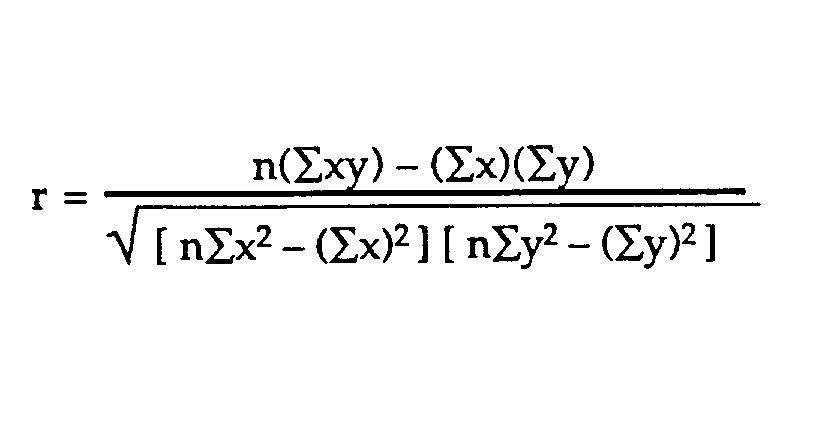

In [168]:
# 9. Calculate the correlation between restaurant prices and average ratings.
print(f"Correlation by Python is : {df['Price'].corr(df['Avg_ratings'])}")


query9 = """

SELECT
    (N * Product - SUM_Price * SUM_Avg_ratings) /
    SQRT((N * Price_Square - POW((SUM_Price),2)) * (N * Avg_ratings_Square -POW((SUM_Avg_ratings),2)) )
    AS Correlation_By_SQL
FROM (
    SELECT
        COUNT(*) AS N,
        SUM(Price * Avg_ratings) AS Product,
        SUM(Price) AS SUM_Price,
        SUM(Avg_ratings) AS SUM_Avg_ratings,
        SUM(Price * Price) AS Price_Square,
        SUM(Avg_ratings * Avg_ratings) AS Avg_ratings_Square
    FROM swiggytable
) AS calculated_values;

"""

cursor.execute(query9)

# Fetch the records
records = cursor.fetchall()

headers =  [desc[0] for desc in cursor.description]
# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))
print('The accuracy difference is clear')

Correlation by Python is : 0.11363038630435687
+----------------------+
|   Correlation_By_SQL |
|----------------------|
|              0.11363 |
+----------------------+
The accuracy difference is clear


# Standard Deviation


## Difference between Population Standard Deviation and Sample Standard Deviation

The population standard deviation and sample standard deviation are both measures of how spread out a set of data is. However, there is a key difference between the two: the population standard deviation is calculated using all of the data points in the population, while the sample standard deviation is calculated using a subset of the data points, called the sample.

**Formulas**

The formula for population standard deviation is:


**<span style="color:blue">σ = √∑(x - μ)^2/N</span>** 


where:

* σ is the population standard deviation
* x is a data point
* μ is the population mean
* N is the number of data points in the population

The formula for sample standard deviation is:

**<span style="color:blue">s = √∑(x - x̄)^2/(n - 1)</span>** 

where:

* s is the sample standard deviation
* x is a data point
* x̄ is the sample mean
* n is the number of data points in the sample


### Accuracy

The <span style="color:blue">population standard deviation</span> is more accurate than the <span style="color:blue">sample standard deviation</span> because it is calculated using all of the data points in the population. However, the population standard deviation is not always available, as it may not be possible to collect data on all the members of a population. In these cases, the <span style="color:blue">sample standard deviation</span> can be used as an estimate of the population standard deviation.

### ddof 


|Parameter	|ddof=0	|ddof=1 |
|---|---|---|
|Description	|Calculates the population standard deviation	|Calculates the sample standard deviation|
|Accuracy	|More accurate	|Less accurate|
|Assumption	|The population mean is known	|The population mean is unknown|
|Usefulness	|Not often used	|More often used|

### MySQL vs Python

* In MySQL the default degrees of freedom (ddof) is 0 meaning it calculates population standard deviation by default
* In pandas the default degrees of freedom (ddof) is 1 meaning it calculates sample standard deviation by default


In [170]:
# 10. List the areas where the distribution of delivery times has the highest standard deviation

# First by Python

# Group the data by 'Area'
grouped= df.groupby('Area')['Delivery_time']

# Calculate the standard deviation for each group
pop_std_deviation = grouped.std(ddof=0)  # Use ddof=0 for population standard deviation 
sample_std_deviation = grouped.std(ddof=1)  # Use ddof=0 for population standard deviation 

print(pop_std_deviation.to_frame().tail(2))
sample_std_deviation.to_frame().tail(2)

             Delivery_time
Area                      
Yousufguda             1.0
Zamistanpur            2.0


,Delivery_time
Area,
Yousufguda,1.414214
Zamistanpur,2.828427


In [171]:
# Sort
pop_sorted_std = pop_std_deviation.sort_values(ascending=False)
sample_sorted_std = sample_std_deviation.sort_values(ascending=False)


# Get the area with the highest standard deviation
highest_std_area_pop = pop_sorted_std.index[0]
highest_std_area_sample = sample_sorted_std.index[0]

# Get value at index 0
value_pop=pop_sorted_std.iloc[0]
value_sample=sample_sorted_std.iloc[0]

In [172]:
# Print or display the result
print(f"The area with the highest population standard deviation of delivery times is: {highest_std_area_pop} with standard deviation {value_pop}")
print(f"The area with the highest sample standard deviation of delivery times is: {highest_std_area_sample} with standard deviation {value_sample}\n")

print(f'The sample population is {value_sample-value_pop} greater and less accurate than population stdeviation')

The area with the highest population standard deviation of delivery times is: Kidderpore with standard deviation 20.0
The area with the highest sample standard deviation of delivery times is: Kidderpore with standard deviation 28.284271247461902

The sample population is 8.284271247461902 greater and less accurate than population stdeviation


In [173]:
# Now by SQL

query10 = """

SELECT Area, STDDEV(Delivery_time) 
AS Sample_Standard_Deviation_By_Default 
FROM swiggytable
GROUP BY Area
ORDER BY Sample_Standard_Deviation_By_Default DESC
LIMIT 1;

"""

cursor.execute(query10)

# Fetch the records
records = cursor.fetchall()

headers =  [desc[0] for desc in cursor.description]
# Print the records using tabulate
print(tabulate(records, headers=headers, tablefmt="psql"))


+------------+----------------------------------------+
| Area       |   Sample_Standard_Deviation_By_Default |
|------------+----------------------------------------|
| Kidderpore |                                     20 |
+------------+----------------------------------------+


In [184]:

# Close the cursor
cursor.close()

# Close the connection
conn.close()

# New Dataset 

Loading new dataset and filling up below dataframe

| Algorithm | Accuracy | Precision | Recall | F1 Score | AUC-ROC | LogLoss|
|---|---|---|---|---|---|---|
| Logistic Regression | 
| Random Forest |
| SVM | 
| Gradient Boosting | 


In [176]:
DF=pd.read_csv('Student_dropout.csv',sep=';')
DF.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [179]:
DF.shape

(4424, 37)

In [177]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [181]:
DF_dtype_counts = DF.dtypes.value_counts()

print(DF_dtype_counts)

int64      29
float64     7
object      1
dtype: int64


In [186]:
DF.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [204]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [187]:
# Split the DFset into features and target
X = DF.drop('Target', axis=1)
y = DF['Target']

In [189]:
y.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)


### <span style="color:green">Precision</span>  
is about how accurate your model is. It measures how many of the positive predictions your model made were actually correct. For example, if your model predicts that 100 emails are spam, and 90 of those emails are actually spam, then your precision is 0.9.

### <span style="color:green">Recall</span> 
is about how complete your model is. It measures how many of the actual positive instances your model predicted as positive. For example, if there are 100 actual spam emails, and your model predicts that 90 of them are spam, then your recall is 0.9.

### <span style="color:green">F1 score</span>  
is a measure of the overall accuracy of your model. It is a combination of precision and recall. A high F1 score indicates that your model is both accurate and complete.

In general, a higher value of precision indicates that the classifier is good at avoiding false positives, while a higher value of recall indicates that the classifier is good at avoiding false negatives. The F1 score is a trade-off between precision and recall.

### Some examples


| Application              | Metric       | Why?                                                                                                      |
|-------------------------|--------------|-----------------------------------------------------------------------------------------------------------|
| Fraud detection         | Precision    | False positives in fraud detection can lead to innocent people being penalized.                         |
| Medical diagnosis       | Recall       | False negatives in medical diagnosis can lead to patients not receiving the treatment they need.         |
| Image classification   | Both precision and recall | Both precision and recall are important in image classification, as it's crucial to identify objects correctly and avoid false positives and false negatives.  |
| Natural language processing | Both precision and recall | Both precision and recall are crucial in natural language processing to accurately understand text and minimize both false positives and false negatives. |
| Speech recognition     | Both precision and recall | Both precision and recall are vital in speech recognition to transcribe speech accurately and minimize false positives and false negatives. |
| Machine translation    | Both precision and recall | Both precision and recall are essential in machine translation to accurately translate text and minimize false positives and false negatives. |
| Recommendation systems | Precision    | Precision is often preferred in recommendation systems to avoid suggesting irrelevant products or services. |
| Targeted advertising   | Precision    | Precision is often favored in targeted advertising to avoid displaying ads to disinterested individuals. |
| Search engines         | Both precision and recall | Both precision and recall are important in search engines to provide relevant results and minimize false positives and false negatives. |
| Social media filtering | Precision    | Precision is often favored in social media filtering to avoid removing content that might not be harmful. |



In [251]:
# Initialize the Logistic Regression model
model = make_pipeline(StandardScaler(), LogisticRegression())

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
y_pred = cross_val_predict(model, X, y, cv=5)

# Calculate evaluation metrics

# In this code, we use the 'macro' averaging method for precision, recall, and F1-score, as well as 'ovo' (one-vs-one) strategy for the multiclass AUC-ROC calculation.
# This way, we can handle multiclass classification while obtaining meaningful evaluation metrics.

accuracy = np.mean(scores)
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')

#  Calculate ROC-AUC using One-vs-Rest strategy
y_probabilities = cross_val_predict(model, X, y, cv=5, method='predict_proba')
# 'macro' means that the ROC-AUC scores for each class are calculated independently,  and then their unweighted mean is taken. Each class contributes equally to the final score, 
# regardless of the class's frequency or imbalance.
roc_auc = roc_auc_score(y, y_probabilities, average='macro', multi_class='ovr')

# Calculate log loss
logloss = -np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_log_loss'))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

Accuracy: 0.7656
Precision: 0.7065
Recall: 0.6694
F1-Score: 0.6773
AUC-ROC: 0.8822
Log Loss: 0.5747


In [255]:
print(f"score for each fold is {scores} (total 5 folds)\
\n\n Predictions = {y_pred} ,\t Total predictions ={len(y_pred)}\
\n\nProbabilities of predictions {y_probabilities}\
\n\n Total Prob of preds = {len(y_probabilities)}\t  & thier Range = {np.amin(y_probabilities)} to {np.amax(y_probabilities)}\
\n\n accuracy = {accuracy} \n precision = {precision}\n recall = {recall}\n f1 ={f1}\
\n\n roc score = {roc_auc} \t logloss = {logloss}")

score for each fold is [0.77514124 0.76158192 0.77966102 0.76271186 0.74886878] (total 5 folds)

 Predictions = ['Dropout' 'Dropout' 'Dropout' ... 'Dropout' 'Graduate' 'Graduate'] ,	 Total predictions =4424

Probabilities of predictions [[4.83521158e-01 2.11227116e-01 3.05251726e-01]
 [4.70027256e-01 1.01149165e-01 4.28823579e-01]
 [9.96872081e-01 3.11424106e-03 1.36776560e-05]
 ...
 [8.64869482e-01 9.69744027e-02 3.81561151e-02]
 [2.14318878e-02 3.53454191e-02 9.43222693e-01]
 [9.52261763e-03 2.68235967e-02 9.63653786e-01]]

 Total Prob of preds = 4424	  & thier Range = 3.7568390601827354e-07 to 0.9993285821828174

 accuracy = 0.7655929646956567 
 precision = 0.7065259969304899
 recall = 0.6694465067647061
 f1 =0.6773452215277068

 roc score = 0.8821689545311527 	 logloss = 0.5747266403967904


In [215]:
from sklearn.svm import SVC

# Initialize the SVM model with probability=True
svm_model = make_pipeline(StandardScaler(), SVC(probability=True))

# Perform k-fold cross-validation
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
svm_y_pred = cross_val_predict(svm_model, X, y, cv=5)

# Calculate evaluation metrics
svm_accuracy = np.mean(svm_scores)
svm_precision = precision_score(y, svm_y_pred, average='macro')
svm_recall = recall_score(y, svm_y_pred, average='macro')
svm_f1 = f1_score(y, svm_y_pred, average='macro')

# Calculate ROC-AUC using One-vs-Rest strategy and predicted probabilities
svm_y_probabilities = cross_val_predict(svm_model, X, y, cv=5, method='predict_proba')
svm_roc_auc = roc_auc_score(y, svm_y_probabilities, average='macro', multi_class='ovr')

# Calculate log loss
svm_logloss = -np.mean(cross_val_score(svm_model, X, y, cv=5, scoring='neg_log_loss'))

print("SVM Classifier Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"AUC-ROC: {svm_roc_auc:.4f}")
print(f"Log Loss: {svm_logloss:.4f}")


SVM Classifier Metrics:
Accuracy: 0.7656
Precision: 0.7168
Recall: 0.6683
F1-Score: 0.6798
AUC-ROC: 0.8765
Log Loss: 0.5873


In [213]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Perform k-fold cross-validation
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')
gb_y_pred = cross_val_predict(gb_model, X, y, cv=5)

# Calculate evaluation metrics
gb_accuracy = np.mean(gb_scores)
gb_precision = precision_score(y, gb_y_pred, average='macro')
gb_recall = recall_score(y, gb_y_pred, average='macro')
gb_f1 = f1_score(y, gb_y_pred, average='macro')

# Calculate ROC-AUC using One-vs-Rest strategy
gb_y_probabilities = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
gb_roc_auc = roc_auc_score(y, gb_y_probabilities, average='macro', multi_class='ovr')

# Calculate log loss
gb_logloss = -np.mean(cross_val_score(gb_model, X, y, cv=5, scoring='neg_log_loss'))

print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")
print(f"AUC-ROC: {gb_roc_auc:.4f}")
print(f"Log Loss: {gb_logloss:.4f}")


Gradient Boosting Classifier Metrics:
Accuracy: 0.7780
Precision: 0.7297
Recall: 0.6943
F1-Score: 0.7050
AUC-ROC: 0.8950
Log Loss: 0.5476


In [214]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Perform k-fold cross-validation
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
rf_y_pred = cross_val_predict(rf_model, X, y, cv=5)

# Calculate evaluation metrics
rf_accuracy = np.mean(rf_scores)
rf_precision = precision_score(y, rf_y_pred, average='macro')
rf_recall = recall_score(y, rf_y_pred, average='macro')
rf_f1 = f1_score(y, rf_y_pred, average='macro')

# Calculate ROC-AUC using One-vs-Rest strategy
rf_y_probabilities = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')
rf_roc_auc = roc_auc_score(y, rf_y_probabilities, average='macro', multi_class='ovr')

# Calculate log loss
rf_logloss = -np.mean(cross_val_score(rf_model, X, y, cv=5, scoring='neg_log_loss'))

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_roc_auc:.4f}")
print(f"Log Loss: {rf_logloss:.4f}")


Random Forest Classifier Metrics:
Accuracy: 0.7749
Precision: 0.7254
Recall: 0.6821
F1-Score: 0.6928
AUC-ROC: 0.8840
Log Loss: 0.6050


## Learnings

---
### ROC-AUC Averaging Strategies

- <span style="color:blue">**average='macro':**</span>
  The ROC-AUC scores for each class are calculated independently, and then their unweighted mean (ex=> 1+2+3/3) is taken. Each class contributes equally to the final score, regardless of the class's frequency or imbalance.
- <span style="color:blue">**average='micro':**</span> 
    If you use 'micro' averaging, the ROC-AUC scores are calculated globally by considering all the true positives, false positives, true negatives, and false negatives together.
- <span style="color:blue">**average='weighted':**</span>
    If you use 'weighted' averaging, the ROC-AUC scores are weighted by the number of samples in each class.


### Choose what? 

  - Choose <span style="color:#3fba02">macro</span> if you want to give equal importance to every class's performance and provide a balanced evaluation across all classes.
  - Choose <span style="color:#3fba02">micro</span> when overall performance across all classes is critical, especially in the presence of class imbalances.
  - Choose <span style="color:#3fba02">weighted</span> when you want to consider class distribution and give more weight to larger or more important classes.

### Multiclass Strategy Options

-<span style="color:blue">**multi_class parameter:OVR**</span>

  - In the OvR strategy, you build a binary classifier for each class against all the other classes combined.
  - For example, if you have 5 classes (A, B, C, D, E), you would train classifiers for:
    - Classifier for Class A vs. Classes (B, C, D, E)
    - Classifier for Class B vs. Classes (A, C, D, E)
    - Classifier for Class C vs. Classes (A, B, D, E)
    - Classifier for Class D vs. Classes (A, B, C, E)
    - Classifier for Class E vs. Classes (A, B, C, D)
  - The class with the highest "confidence" or probability is predicted by each classifier, and then the class with the most "votes" across all classifiers is chosen as the final prediction.

-<span style="color:blue">**multi_class parameter:OVO**</span>
  
  - In the OvO strategy, you build a binary classifier for every pair of classes.
  - For example, if you have 5 classes (A, B, C, D, E), you would train classifiers for AB, AC, AD, AE, BC, BD, BE, CD, CE, and DE.
  - Each binary classifier decides between two classes, and the class with the most "votes" across all classifiers is chosen as the final prediction.

### Choose what?

 - Choose <span style="color:#3fba02">OVR</span> when you have a large number of classes and computational efficiency matters. It simplifies the problem but might result in imbalanced binary classification problems. This is a common and practical strategy.
  

- Choose <span style="color:#3fba02">OVO</span> when you have a moderate number of classes and you want to evaluate each class's pairwise performance. It provides a more fine-grained evaluation but requires more models to be trained.
  
### Log Loss (Logarithmic Loss):

- Log loss, also known as logarithmic loss or cross-entropy loss, is a widely used evaluation metric for classification problems. It quantifies how well a classifier's predicted probabilities match the actual class labels. In simple terms, it measures how confident and accurate the model's predictions are.

- In machine learning, the goal is to minimize log loss. A model with low log loss is making confident and accurate predictions, while a model with high log loss is less reliable.

- Remember that log loss is commonly used for evaluation and not something you directly optimize when training a model. It's a way to assess how well your classifier's probabilities align with the real-world classes it's trying to predict.

---


In [266]:
data = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [f'{accuracy:.2%}', f'{rf_accuracy:.2%}', f'{svm_accuracy:.2%}', f'{gb_accuracy:.2%}'],
    'Precision': [f'{precision:.2%}', f'{rf_precision:.2%}', f'{svm_precision:.2%}', f'{gb_precision:.2%}'],
    'Recall': [f'{recall:.2%}', f'{rf_recall:.2%}', f'{svm_recall:.2%}', f'{gb_recall:.2%}'],
    'F1 Score': [f'{f1:.2%}', f'{rf_f1:.2%}', f'{svm_f1:.2%}', f'{gb_f1:.2%}'],
    'AUC-ROC': [f'{roc_auc:.2%}', f'{rf_roc_auc:.2%}', f'{svm_roc_auc:.2%}', f'{gb_roc_auc:.2%}'],
    'Log Loss': [f'{logloss:.3f}', f'{rf_logloss:.3f}', f'{svm_logloss:.3f}', f'{gb_logloss:.3f}']
}


df = pd.DataFrame(data)
df.head(10)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Log Loss
0,Logistic Regression,76.56%,70.65%,66.94%,67.73%,88.22%,0.575
1,Random Forest,77.49%,72.54%,68.21%,69.28%,88.40%,0.605
2,SVM,76.56%,71.68%,66.83%,67.98%,87.65%,0.587
3,Gradient Boosting,77.80%,72.97%,69.43%,70.50%,89.50%,0.548
